# 2017 공공 빅데이터 공모전
## 수도미터 동파 예측 알고리즘 개발 및 대국민 동파예보 시행


> ### ■ 주최·주관/후원
> * 행정자치부, 한국정보화진흥원/한국수자원공사

> ### ■ 일정
> * 공모접수 : ‘17.6.27.~7.9.
> * 최종 결과물 제출: ~‘17.8.20.
> * 1차 서류 심사: ‘17.8.25.
> * 2차 순위결정전 및 시상: ‘17.8.30.

> ### ■ 제출자
> * 이름 : 최재완
> * e-Mail : <billiekorea@gmail.com>

> ### ■ 이용 도구
> * 데이터 탐색 / 전처리 : Microsoft Excel/PowerPoint, Python 3
> * 데이터 분석 : Python 3
> * 데이터 시각화 : Microsoft Excel/PowerPoint/Power BI
> * 결과보고 : 한컴오피스 한글, Microsoft PowerPoint

> ### ■ 알고리즘
> * Logistic Regression
> * Random Forest



<br><br>

---

<br><br>

# 1. 데이터 탐색 / 전처리 (EDA : Exploratory Data Analysis) 

### 1.1 제공된 데이터셋 (NIA : 한국정보화진흥원)
> a. 동파 발생 데이터  
> b. 수용가 데이터  
> c. 수도미터 데이터  
> d. 급수관로 데이터  

### 1.2 import library

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import xlrd

import re
from pprint import pprint

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

import xgboost as xgb

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.3 read DataSet (Excel File)

In [2]:
paju = pd.read_excel('paju_data_ver2.xlsx')

In [3]:
X_test = pd.read_excel('paju_data_ver3_test.xlsx')
X_train = pd.read_excel('paju_data_ver3_train.xlsx')

In [4]:
X_test.tail()

,ID,break,date,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,district,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,meter_id,meter_mfg_no,mm
10451,414801000873,1,2016-02-22,0.0,-4.9,0.0,-6.0,0,9,-1.1,yadang-dong,0,1,0,0,1,0,2015609917,K-S15-013459,13.0
10452,414800924512,0,2016-09-08,21.2,18.8,22.6,18.7,0,0,-0.1,jori-eup,0,1,0,1,0,0,2016066284,PAJU-S16-103156,13.0
10453,414800922974,0,2016-11-08,3.1,-2.3,0.8,-5.0,0,1,-2.7,yadang-dong,0,1,0,1,0,0,2016063164,PAJU-S16-100035,13.0
10454,414800923423,0,2016-10-08,16.1,9.7,10.2,4.2,0,0,-5.5,sangjiseok-dong,0,1,0,1,0,0,2016064690,PAJU-S16-101562,13.0
10455,414801604013,1,2017-04-11,14.0,9.5,9.5,3.3,0,0,-6.2,geumneung-dong,1,0,0,1,0,0,2016065700,PAJU-S16-102572,13.0


### 1. 4 Explore Data

In [5]:
X_train.head()


,ID,break,date,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,district,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,meter_id,meter_mfg_no,mm
0,414801600489,0,2015-10-07,17.0,13.5,18.1,11.2,0,0,-2.3,mokdong-dong,1,0,0,1,0,0,2.016005e+09,15-000949,25
1,414801600457,0,2015-12-07,-0.2,-6.7,0.0,-5.4,2,5,1.3,mokdong-dong,1,0,0,1,0,0,2.016005e+09,15-003073,25
2,414801600456,0,2015-12-07,-0.2,-6.7,0.0,-5.4,2,5,1.3,mokdong-dong,1,0,0,0,1,0,2.016005e+09,15-004937,20
3,414801600455,0,2015-12-07,-0.2,-6.7,0.0,-5.4,2,5,1.3,mokdong-dong,1,0,0,1,0,0,2.016005e+09,15-003862,20
4,414801600452,0,2015-12-07,-0.2,-6.7,0.0,-5.4,2,5,1.3,mokdong-dong,1,0,0,1,0,0,2.016005e+09,15-002663,25


In [6]:
X_train.shape

(44132, 20)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44132 entries, 0 to 44131
Data columns (total 20 columns):
ID                   44132 non-null int64
break                44132 non-null int64
date                 44132 non-null datetime64[ns]
today_avr            44132 non-null float64
today_low            44132 non-null float64
yesterday_avr        44132 non-null float64
yesterday_low        44132 non-null float64
continue_days_avr    44132 non-null int64
continue_days_low    44132 non-null int64
gap_degrees          44132 non-null float64
district             44132 non-null object
status_open          44132 non-null int64
stauts_close         44132 non-null int64
status_stop          44132 non-null int64
category_home        44132 non-null int64
category_ordinary    44132 non-null int64
category_sauna       44132 non-null int64
meter_id             43759 non-null float64
meter_mfg_no         44100 non-null object
mm                   44132 non-null int64
dtypes: datetime64[ns](1), f

In [8]:
y = paju.loc[:,'break']

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: break, dtype: int64

In [10]:
X = X_train.copy()
X2 = X_test.copy()

In [11]:
X.tail()

,ID,break,date,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,district,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,meter_id,meter_mfg_no,mm
44127,414800903706,1,2011-01-16,-16.5,-23.0,-14.1,-22.8,25,42,0.2,adong-dong,1,0,0,0,1,0,2.015130e+09,10-074836,13
44128,414800925002,1,2011-01-17,-14.1,-22.8,-11.6,-20.1,26,43,2.7,jori-eup,0,1,0,1,0,0,2.015133e+09,10-074063,13
44129,414800923123,1,2011-01-17,-14.1,-22.8,-11.6,-20.1,26,43,2.7,sangjiseok-dong,0,1,0,0,1,0,2.015125e+09,10-003783,25
44130,414801600362,0,2015-12-07,-0.2,-6.7,0.0,-5.4,2,5,1.3,yadang-dong,1,0,0,1,0,0,2.016012e+09,15-006514,13
44131,414801503432,0,2015-11-07,9.5,8.1,10.5,9.2,0,0,1.1,sangjiseok-dong,1,0,0,1,0,0,2.016003e+09,15-027748,13


In [12]:
X = X.drop('date', axis = 1)

X = X.drop('ID', axis = 1)
X = X.drop('district', axis = 1)
X = X.drop('meter_id', axis = 1)

X = X.drop('meter_mfg_no', axis = 1)

In [13]:
X2 = X2.drop('date', axis = 1)

X2 = X2.drop('ID', axis = 1)
X2 = X2.drop('district', axis = 1)
X2 = X2.drop('meter_id', axis = 1)

X2 = X2.drop('meter_mfg_no', axis = 1)
del X2['break']

In [14]:
del X['break']

In [15]:
X.tail()

,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,mm
44127,-16.5,-23.0,-14.1,-22.8,25,42,0.2,1,0,0,0,1,0,13
44128,-14.1,-22.8,-11.6,-20.1,26,43,2.7,0,1,0,1,0,0,13
44129,-14.1,-22.8,-11.6,-20.1,26,43,2.7,0,1,0,0,1,0,25
44130,-0.2,-6.7,0.0,-5.4,2,5,1.3,1,0,0,1,0,0,13
44131,9.5,8.1,10.5,9.2,0,0,1.1,1,0,0,1,0,0,13


In [16]:
X2.tail()

,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,mm
10451,0.0,-4.9,0.0,-6.0,0,9,-1.1,0,1,0,0,1,0,13.0
10452,21.2,18.8,22.6,18.7,0,0,-0.1,0,1,0,1,0,0,13.0
10453,3.1,-2.3,0.8,-5.0,0,1,-2.7,0,1,0,1,0,0,13.0
10454,16.1,9.7,10.2,4.2,0,0,-5.5,0,1,0,1,0,0,13.0
10455,14.0,9.5,9.5,3.3,0,0,-6.2,1,0,0,1,0,0,13.0


In [17]:
X.isnull().sum()

today_avr            0
today_low            0
yesterday_avr        0
yesterday_low        0
continue_days_avr    0
continue_days_low    0
gap_degrees          0
status_open          0
stauts_close         0
status_stop          0
category_home        0
category_ordinary    0
category_sauna       0
mm                   0
dtype: int64

In [18]:
X2.isnull().sum()

today_avr            0
today_low            0
yesterday_avr        0
yesterday_low        0
continue_days_avr    0
continue_days_low    0
gap_degrees          0
status_open          0
stauts_close         0
status_stop          0
category_home        0
category_ordinary    0
category_sauna       0
mm                   2
dtype: int64

In [19]:
X2['mm'].fillna((X2['mm'].mean()), inplace = True)
X2.isnull().sum()

today_avr            0
today_low            0
yesterday_avr        0
yesterday_low        0
continue_days_avr    0
continue_days_low    0
gap_degrees          0
status_open          0
stauts_close         0
status_stop          0
category_home        0
category_ordinary    0
category_sauna       0
mm                   0
dtype: int64

In [20]:
X['mm'].fillna((X['mm'].mean()), inplace = True)
X.isnull().sum()

today_avr            0
today_low            0
yesterday_avr        0
yesterday_low        0
continue_days_avr    0
continue_days_low    0
gap_degrees          0
status_open          0
stauts_close         0
status_stop          0
category_home        0
category_ordinary    0
category_sauna       0
mm                   0
dtype: int64

In [21]:
X.head()

,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,mm
0,17.0,13.5,18.1,11.2,0,0,-2.3,1,0,0,1,0,0,25
1,-0.2,-6.7,0.0,-5.4,2,5,1.3,1,0,0,1,0,0,25
2,-0.2,-6.7,0.0,-5.4,2,5,1.3,1,0,0,0,1,0,20
3,-0.2,-6.7,0.0,-5.4,2,5,1.3,1,0,0,1,0,0,20
4,-0.2,-6.7,0.0,-5.4,2,5,1.3,1,0,0,1,0,0,25


In [22]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44132 entries, 0 to 44131
Data columns (total 14 columns):
today_avr            44132 non-null float64
today_low            44132 non-null float64
yesterday_avr        44132 non-null float64
yesterday_low        44132 non-null float64
continue_days_avr    44132 non-null int64
continue_days_low    44132 non-null int64
gap_degrees          44132 non-null float64
status_open          44132 non-null int64
stauts_close         44132 non-null int64
status_stop          44132 non-null int64
category_home        44132 non-null int64
category_ordinary    44132 non-null int64
category_sauna       44132 non-null int64
mm                   44132 non-null int64
dtypes: float64(5), int64(9)
memory usage: 4.7 MB


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=10)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#x_train, x_test, y_train, y_test = train_test_split(X, x_train['break'], random_state = 1)

In [27]:
x_train = X.copy()
x_test = X2.copy()
y_train = X_train['break']
y_test=X_test['break']

In [28]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [29]:
x_train.shape

(44132, 14)

In [30]:
y_train.shape

(44132,)

In [31]:
forest1 = rf.fit_transform(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
forest = rf.fit(x_train, y_train)

In [33]:
importance = rf.feature_importances_

In [34]:
importance

array([  1.66569253e-01,   1.94556914e-01,   1.41670225e-01,
         1.49268388e-01,   9.77880035e-02,   1.14461627e-01,
         1.18507797e-01,   6.65834153e-04,   8.43312836e-04,
         5.62168588e-04,   7.91476195e-03,   2.85732477e-03,
         5.60841461e-05,   4.27830658e-03])

In [75]:
def Show_Feature_Importances(f_importances):
    f_importances = rf.feature_importances_
    indices = f_importances.argsort()[::-1]
    f_importances_sorted = []
    for idx in indices:
        f_importances_sorted.append(f_importances[idx])
        
    pd.Series(f_importances_sorted, index = X.columns).plot(kind='bar', color='b')

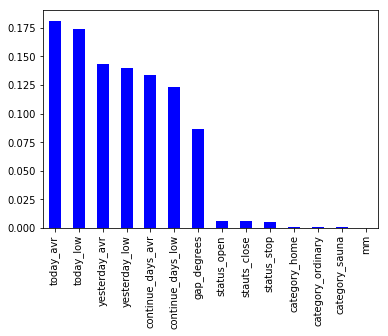

In [76]:
Show_Feature_Importances(rf.feature_importances_)

In [37]:
x_test.tail()

,today_avr,today_low,yesterday_avr,yesterday_low,continue_days_avr,continue_days_low,gap_degrees,status_open,stauts_close,status_stop,category_home,category_ordinary,category_sauna,mm
10451,0.0,-4.9,0.0,-6.0,0,9,-1.1,0,1,0,0,1,0,13.0
10452,21.2,18.8,22.6,18.7,0,0,-0.1,0,1,0,1,0,0,13.0
10453,3.1,-2.3,0.8,-5.0,0,1,-2.7,0,1,0,1,0,0,13.0
10454,16.1,9.7,10.2,4.2,0,0,-5.5,0,1,0,1,0,0,13.0
10455,14.0,9.5,9.5,3.3,0,0,-6.2,1,0,0,1,0,0,13.0


In [38]:
y_pred = rf.predict(x_test)

In [39]:
y_test.shape

(10456,)

In [40]:
y_pred.shape


(10456,)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.11840091813312931

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_test, y_pred)

0.13624437781109447

# 로지스틱 회귀모델

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(x_train, y_train)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [46]:
rr = lr.predict_proba(x_test)

In [47]:
rr

array([[ 0.93155809,  0.06844191],
       [ 0.96762905,  0.03237095],
       [ 0.96762905,  0.03237095],
       ..., 
       [ 0.92079503,  0.07920497],
       [ 0.97896056,  0.02103944],
       [ 0.97685788,  0.02314212]])

In [48]:
import matplotlib.pyplot as plt

In [49]:
RR = pd.DataFrame(rr)
RR.columns = ['not break', 'break']

In [50]:
RR_series = RR['break']

In [51]:
y_pred = lr.predict(x_test)

In [52]:
accuracy_score(y_test, y_pred)

0.9313312930374904

In [53]:
f1_score(y_test, y_pred)

0.10918114143920596

<br><br><br><br>

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [55]:
def inv_outcometype_mapping(x):
    if x == 0:
        return 'not Break'
    elif x == 1:
        return 'Break'
    

def Best_Parameters(model, hyperparameter_space):
    model = GridSearchCV(estimator = model, 
                         param_grid = hyperparameter_space, 
                         cv=10)
    model.fit(x_train, y_train)
    
    return model.best_params_
    
    
def RandomForest_Model():
    model = RandomForestClassifier()
    hyperparameter_space = {'n_estimators' : [350, 375, 400],
                            'max_features' : ['auto', 'log2']
                           }

    best_params = Best_Parameters(model, hyperparameter_space)
    rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                max_features=best_params['max_features']).fit(x_train, y_train)
    print (best_params)
    return rf


def SVM_Model():
    model = SVC()
    hyperparameter_space = {'gamma': ['auto'], 
                            'C': [10, 15]}

    best_params = Best_Parameters(model, hyperparameter_space)
    svc = SVC(gamma = best_params['gamma'], 
              C = best_params['C']).fit(x_train, y_train)
    print (best_params)
    return svc


def KNN_Model():
    model = KNeighborsClassifier()
    hyperparameter_space = {'n_neighbors': [16, 18, 20], 
                            'leaf_size': [25]}

    best_params = Best_Parameters(model, hyperparameter_space)
    knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], 
                               leaf_size = best_params['leaf_size']).fit(x_train, y_train)
    print (best_params)
    return knn


def Prediction(model, data):
    prediction = {}
    try:
        predicted = model.predict(data.values)
        prediction['predicted'] = predicted

        predicted_proba = model.predict_proba(data.values)
        prediction['predicted_proba'] = predicted_proba
    except:
        pass
    
    return prediction
    

def Result(model):
    result = {}
    OutcomeType = ['not Break', 'Break']
    
    result['model'] = model
    result['prediction'] = Prediction(model, x_test)
    result['report'] = classification_report(y_test, 
                                             Prediction(model, x_test)['predicted'],
                                             target_names=OutcomeType)
    result['score'] = model.score(x_test, y_test)
    
    return result


def Show_Feature_Importances(f_importances):
    f_importances = rf.feature_importances_
    indices = f_importances.argsort()[::-1] # rank 높은 index부터 정렬
    f_importances_sorted = []
    for idx in indices:
        f_importances_sorted.append(f_importances[idx])

    pd.Series(f_importances_sorted, index=copy.columns).plot(kind='bar', color='r')

## KNN

#### Model Selection

In [56]:
%%time
knn = KNN_Model()

{'leaf_size': 25, 'n_neighbors': 16}
CPU times: user 1min 55s, sys: 1.12 s, total: 1min 56s
Wall time: 1min 58s


In [57]:
knn_result = Result(knn)

In [58]:
pprint (knn_result)

{'model': KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform'),
 'prediction': {'predicted': array([0, 1, 1, ..., 0, 0, 1]),
                'predicted_proba': array([[ 0.875 ,  0.125 ],
       [ 0.375 ,  0.625 ],
       [ 0.375 ,  0.625 ],
       ..., 
       [ 0.8125,  0.1875],
       [ 0.5625,  0.4375],
       [ 0.    ,  1.    ]])},
 'report': '             precision    recall  f1-score   support\n'
           '\n'
           '  not Break       0.95      0.50      0.66      9694\n'
           '      Break       0.09      0.65      0.16       762\n'
           '\n'
           'avg / total       0.89      0.51      0.62     10456\n',
 'score': 0.51243305279265494}


### SVM

#### Model Selection

In [59]:
%%time
svc = SVM_Model()

{'C': 10, 'gamma': 'auto'}
CPU times: user 9min 2s, sys: 9.36 s, total: 9min 12s
Wall time: 9min 17s


In [60]:
svc_result = Result(svc)

In [61]:
pprint (svc_result)

{'model': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
 'prediction': {'predicted': array([0, 1, 1, ..., 1, 1, 1])},
 'report': '             precision    recall  f1-score   support\n'
           '\n'
           '  not Break       0.88      0.05      0.10      9694\n'
           '      Break       0.07      0.91      0.13       762\n'
           '\n'
           'avg / total       0.82      0.11      0.10     10456\n',
 'score': 0.11294950267788829}


### Random Forest

#### Model Selection

In [62]:
%%time
rf = RandomForest_Model()

{'max_features': 'auto', 'n_estimators': 350}
CPU times: user 9min 58s, sys: 8.18 s, total: 10min 6s
Wall time: 10min 7s


In [63]:
rf_result = Result(rf)

In [64]:
pprint (rf_result)

{'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=350, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
 'prediction': {'predicted': array([1, 1, 1, ..., 0, 1, 1]),
                'predicted_proba': array([[ 0.19714286,  0.80285714],
       [ 0.05991404,  0.94008596],
       [ 0.05991404,  0.94008596],
       ..., 
       [ 0.51142857,  0.48857143],
       [ 0.12      ,  0.88      ],
       [ 0.01998016,  0.98001984]])},
 'report': '             precision    recall  f1-score   support\n'
           '\n'
           '  not Break       0.83      0.01      0.01      9694\n'
           '      Break       0.07      0.98      0.13       762\n'
           '\n'
           'avg / total       0.77      0.08   